In [1]:
import sys
import sklearn
import matplotlib
import numpy as np

In [3]:
from keras.datasets import mnist

(x_train,y_train), (x_test,y_test) = mnist.load_data();

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print('Training Data:{}'.format(x_train.shape))
print('Training Labels {}'.format(y_train.shape))


Training Data:(60000, 28, 28)
Training Labels (60000,)


In [5]:
print("Testing Data:{}".format(x_test.shape))
print('Testing Labels:{}'.format(y_test.shape))

Testing Data:(10000, 28, 28)
Testing Labels:(10000,)


In [7]:
import matplotlib.pyplot as plt


%matplotlib inline

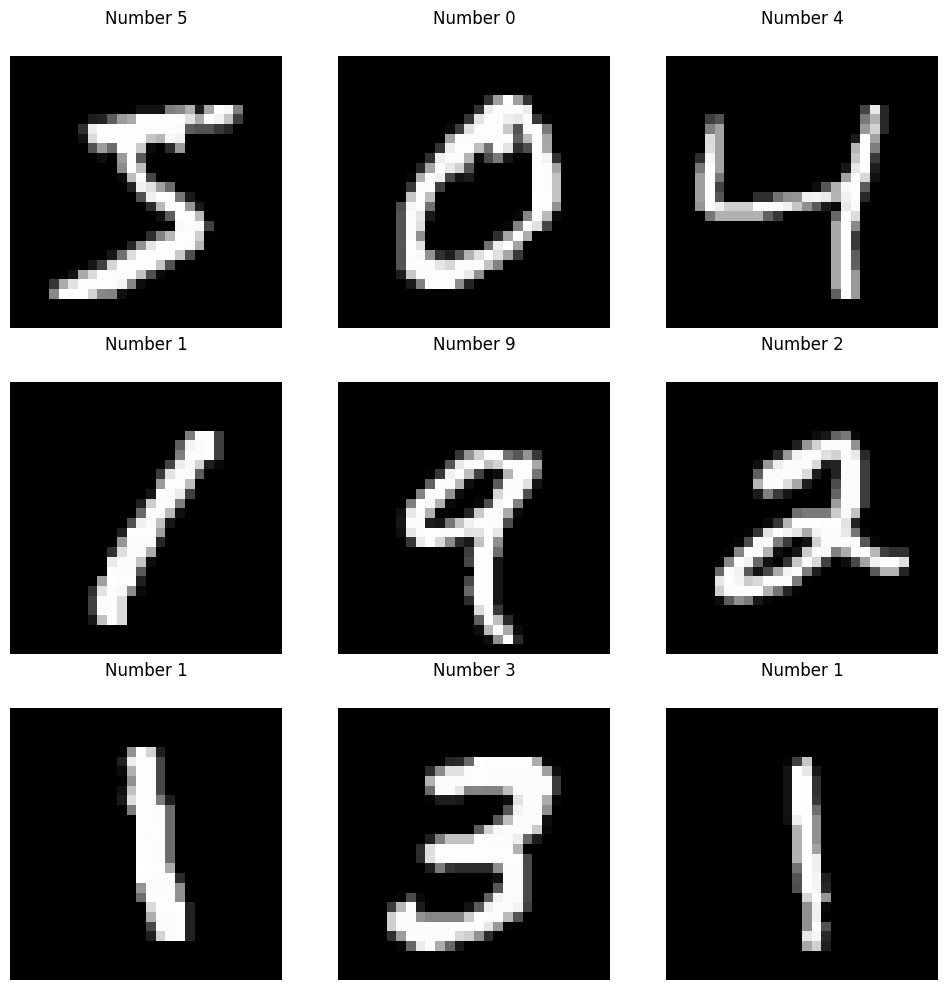

In [11]:
fig, axs = plt.subplots(3,3,figsize=(12,12))

plt.gray()

for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number {}'.format(y_train[i]))


fig.show()

In [16]:
X= x_train.reshape(len(x_train),-1)
Y=y_train

X=X.astype(float) / 255.

print(X.shape)
print(X[0].shape)


(60000, 784)
(784,)


In [14]:
print(X.shape)

(60000, 784)


In [17]:
from sklearn.cluster import MiniBatchKMeans

n_digits= len(np.unique(y_test))
print(n_digits)

kmeans= MiniBatchKMeans(n_clusters=n_digits)

kmeans.fit(X)

10


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

In [20]:
kmeans.labels_[:20]

array([2, 5, 3, 1, 7, 9, 6, 2, 6, 7, 2, 1, 2, 8, 6, 7, 9, 7, 8, 7],
      dtype=int32)

In [35]:
def infer_cluster_labels(kmeans,actual_labels):
  #Associates most probable label with each clluster in kmeans model
  #Returns : Dictionary of Clusters assigned to each label

  inferred_labels={}
  for i in range(kmeans.n_clusters):
    labels=[]
    index = np.where(kmeans.labels_ == i)

    labels.append(actual_labels[index])
    if len(labels[0]) == 1:
        counts=np.bincount(labels[0])
    else:
        counts = np.bincount(np.squeeze(labels))
    
    if np.argmax(counts) in inferred_labels:
      inferred_labels[np.argmax(counts)].append(i)
    else:
        inferred_labels[np.argmax(counts)]=[i]
   # print(labels)
    #print('Cluster:{} , label: {}'.format(i,np.argmax(counts)))  
  return inferred_labels


def infer_data_labels(X_labels,cluster_labels):
  predicted_labels=np.zeros(len(X_labels)).astype(np.uint8)

  for i, cluster in enumerate(X_labels):
    for key,value in cluster_labels.items():
      if cluster in value:
        predicted_labels[i]=key

  return predicted_labels




In [28]:
cluster_labels=infer_cluster_labels(kmeans,Y)
X_clusters=kmeans.predict(X)
predicted_labels=infer_data_labels(X_clusters,cluster_labels)

print(predicted_labels[:20])
print(Y[:20])

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]
Cluster:0 , label: 0
[array([1, 5, 1, ..., 1, 1, 1], dtype=uint8)]
Cluster:1 , label: 1
[array([5, 3, 3, ..., 3, 3, 5], dtype=uint8)]
Cluster:2 , label: 3
[array([4, 4, 4, ..., 9, 9, 9], dtype=uint8)]
Cluster:3 , label: 4
[array([4, 2, 7, ..., 7, 7, 9], dtype=uint8)]
Cluster:4 , label: 7
[array([0, 0, 0, ..., 3, 6, 0], dtype=uint8)]
Cluster:5 , label: 0
[array([1, 1, 1, ..., 5, 5, 5], dtype=uint8)]
Cluster:6 , label: 1
[array([9, 4, 7, ..., 9, 8, 8], dtype=uint8)]
Cluster:7 , label: 4
[array([6, 6, 6, ..., 6, 6, 6], dtype=uint8)]
Cluster:8 , label: 6
[array([2, 2, 2, ..., 2, 2, 2], dtype=uint8)]
Cluster:9 , label: 2
[3 0 4 1 4 2 1 3 1 4 3 1 3 6 1 4 2 4 6 4]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [33]:
from sklearn import metrics

def calculate_metrics(estimator, data,labels):

  print('Number Of Clusters:{}'.format(estimator.n_clusters))
  print('Inerita:{}'.format(estimator.inertia_))
  print("Homogeneity:{}".format(metrics.homogeneity_score(labels,estimator.labels_)))

In [36]:

clusters=[10,16,36,64,144,256]


for n_clusters in clusters:
  estimator=MiniBatchKMeans(n_clusters=n_clusters)
  estimator.fit(X)

  calculate_metrics(estimator,X,Y)

  cluster_labels=infer_cluster_labels(estimator,Y)
  predicted_Y=infer_data_labels(estimator.labels_,cluster_labels)

  print('Accuracy: {}\n'.format(metrics.accuracy_score(Y,predicted_Y)))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number Of Clusters:10
Inerita:2383917.035127952
Homogeneity:0.43495726551255676
Accuracy: 0.5261



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number Of Clusters:16
Inerita:2204472.133391546
Homogeneity:0.572481862629425
Accuracy: 0.6534833333333333



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number Of Clusters:36
Inerita:1947966.159757414
Homogeneity:0.6885108136960026
Accuracy: 0.7706166666666666



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number Of Clusters:64
Inerita:1806874.1077108178
Homogeneity:0.7323969113777358
Accuracy: 0.7941166666666667



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number Of Clusters:144
Inerita:1622217.269582354
Homogeneity:0.8123935155729879
Accuracy: 0.8771333333333333



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number Of Clusters:256
Inerita:1501559.9199837544
Homogeneity:0.8413454212512267
Accuracy: 0.8954333333333333



In [38]:
X_test=x_test.reshape(len(x_test),-1)

X_test=X_test.astype(float)/ 255.

kmeans=MiniBatchKMeans(n_clusters=256)
kmeans.fit(X)
cluster_labels=infer_cluster_labels(kmeans,Y)

test_clusters=kmeans.predict(X_test)
predicted_labels=infer_data_labels(test_clusters,cluster_labels)

print("Testing Accuracy:{}".format(metrics.accuracy_score(y_test,predicted_labels)))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Testing Accuracy:0.9


In [45]:
Kmeans=MiniBatchKMeans(n_clusters=28)
kmeans.fit(X)

centroids=kmeans.cluster_centers_

images= centroids.reshape(28,28,28)

images *= 255
images = images.astype(np.uint8)

cluster_labels=infer_cluster_labels(kmeans,Y)

fig,axs = plt.subplot(6,6 ,figsize=(20,20))

plt.gray()

for i, ax in enumerate(axs.flat):
  for key,value in cluster_labels.items():
    if i in value:
      ax.set_title('Inferred Label:{}'.format(key))

  ax.matshow(images[i])
  ax.axis('off')


fig.show()



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: ignored